<a href="https://colab.research.google.com/github/deivanayakis/DeepLearningUsingTF/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [20]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [21]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [22]:
ipdim = X_train.shape[1]
encdim = 32
input_img = layers.Input(shape=(ipdim,))
encoded = layers.Dense(encdim, activation='relu')(input_img)
decoded = layers.Dense(ipdim, activation='sigmoid')(encoded)
autoencoder = models.Model(input_img, decoded)

In [23]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [24]:
autoencoder.fit(X_train,X_train,epochs=20,batch_size=256)

Epoch 1/20
235/235 [==============================] - 3s 9ms/step - loss: 0.2796
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1727
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1461
Epoch 4/20
235/235 [==============================] - 2s 10ms/step - loss: 0.1300
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.1189
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1112
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1060
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.1022
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0995
Epoch 10/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0976
Epoch 11/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0963
Epoch 12/20
235/235 [==============================] - 2s 10ms/step - loss: 0.0955
Epoch 13/20
235/235 

In [25]:
decoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


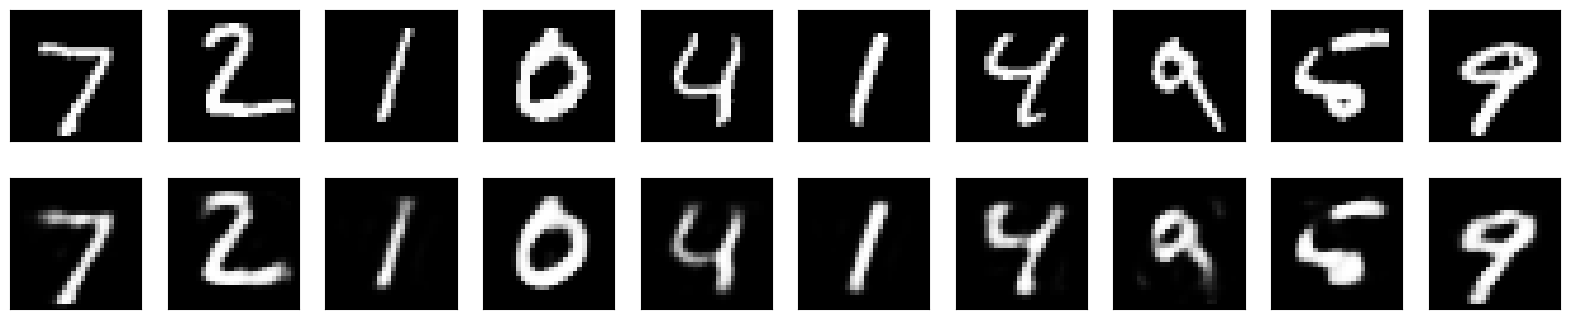

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
